<a href="https://colab.research.google.com/github/Dineshkumar-Anbalagan/KPMG-Virtual-Internship/blob/main/KPMG_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

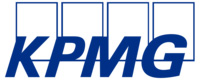

## **TASK**

For context, Sprocket Central Pty Ltd is a long-standing KPMG client whom specialises in high-quality bikes and accessible cycling accessories to riders. Their marketing team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour. 

Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, please recommend which of these 1000 new customers should be targeted to drive the most value for the organisation. 

In building this recommendation, we need to start with a PowerPoint presentation which outlines the approach which we will be taking. The client has agreed on a 3 week scope with the following 3 phases as follows - Data Exploration; Model Development and Interpretation.

Prepare a detailed approach for completing the analysis including activities – i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off. Please advise what steps you would take. 

Please ensure your PowerPoint presentation includes a detailed approach for our strategy behind each of the 3 phases including activities involved in each - i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off.

--
Tips: Raw data fields may be transformed into other calculated fields for modelling purposes (i.e. converting D.O.B to age or age groups).  Tips: You may source external data from the ABS / Census to add additional variables that may help support your model. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
print('Import') 

Import


In [2]:
warnings.simplefilter('ignore')

In [3]:
Transa = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'Transactions', skiprows = 1)
DemoGr = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'CustomerDemographic', skiprows = 1)
CA = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'CustomerAddress', skiprows = 1)

In [4]:
Transa.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [5]:
DemoGr.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [6]:
CA.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


# **Normalization**

### **Transaction Dataset:**

In [7]:
Transa.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0


In [8]:
Transa.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [9]:
Transa.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

In [10]:
Transa.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [11]:
Transa.duplicated().sum() #Identifying duplicate values

0

##### Removing null values

In [12]:
Transa = Transa.dropna() #dropping null values
Transa.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [13]:
for i in Transa.columns:
  print("\n",i,"\n", Transa[i].unique())


 transaction_id 
 [    1     2     3 ... 19998 19999 20000]

 product_id 
 [  2   3  37  88  78  25  22  15  67  12   5  61  35  16  79  33  54  27
  82  89  64  19  72  91   1  99   0  92  14  44  76  46  55  66  81  86
  32  77  96   6  47  94  93  60  28   4  38  56  58  50  80  87  84  21
  31  62  17  73  45  95  18  70  26  39  36  98  75  42  20  24  53  65
  29  11  10   7  41   9  69  97 100  74  90  71  34  57  23  51  59  63
  40   8  13  30  48  49  68  83  43  52  85]

 customer_id 
 [2950 3120  402 ... 3446 2764 3168]

 transaction_date 
 ['2017-02-25T00:00:00.000000000' '2017-05-21T00:00:00.000000000'
 '2017-10-16T00:00:00.000000000' '2017-08-31T00:00:00.000000000'
 '2017-10-01T00:00:00.000000000' '2017-03-08T00:00:00.000000000'
 '2017-04-21T00:00:00.000000000' '2017-07-15T00:00:00.000000000'
 '2017-08-10T00:00:00.000000000' '2017-08-30T00:00:00.000000000'
 '2017-01-17T00:00:00.000000000' '2017-01-05T00:00:00.000000000'
 '2017-02-26T00:00:00.000000000' '2017-09-10T00:00

In [14]:
Transa['Profit'] = Transa['list_price'] - Transa['standard_cost']

In [15]:
Transact = Transa.sort_values(by = 'customer_id', ascending=True) 
Transact.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
93,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,110.56
5156,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,189.28
18969,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0,509.97


### **Customer Demographic**

In [16]:
DemoGr.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0


In [17]:
DemoGr = DemoGr.drop('default', axis=1)

In [18]:
  DemoGr.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [19]:
DemoGr.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                        float64
dtype: object

In [20]:
DemoGr.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [21]:
DemoGr.duplicated().sum()

0

##### Removing Null values:

In [22]:
DemoGraph = DemoGr.dropna()
DemoGraph.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

In [23]:
DemoGraph['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal'], dtype=object)

In [24]:
dict = {"Female":"F", "Femal":"F", "Male":"M"}

#Assumed U as unknown

DemoGraph = DemoGraph.replace({"gender":dict})
DemoGraph["gender"].unique()

array(['F', 'M', 'U'], dtype=object)

In [25]:
DemoGraph = DemoGraph.sort_values(by = 'customer_id', ascending=True)
DemoGraph.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0


### **Customer Address**

In [26]:
CA.head(3)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9


In [27]:
CA.duplicated().sum()

0

In [28]:
CA.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [29]:
CA.dtypes

customer_id            int64
address               object
postcode               int64
state                 object
country               object
property_valuation     int64
dtype: object

In [30]:
x = {"New South Wales":"NSW","Victoria":"VIC"}
CA = CA.replace({"state":x})
CA['state'].unique()

array(['NSW', 'QLD', 'VIC'], dtype=object)

In [31]:
CA['country'].unique()

array(['Australia'], dtype=object)

In [32]:
CA = CA.sort_values(by='customer_id', ascending=True) #Sorting Dataset w.r to "customer_id"
CA.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [33]:
data = pd.merge(Transact, DemoGraph,on='customer_id')

In [34]:
data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,110.56,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,189.28,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
2,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0,509.97,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
3,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,17.87,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
4,15663,32,1,2017-06-04,1.0,Approved,Giant Bicycles,Standard,medium,medium,642.70,211.37,40618.0,431.33,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0


In [35]:
data = pd.merge(data, CA, on = 'customer_id' )

In [36]:
data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,110.56,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10
1,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,189.28,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10
2,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0,509.97,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10
3,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,17.87,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10
4,15663,32,1,2017-06-04,1.0,Approved,Giant Bicycles,Standard,medium,medium,642.70,211.37,40618.0,431.33,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10


In [37]:
print('Dimension of dataset:{}'.format(data.shape),'\n',75*'-')
print('name of the columns:{}'.format(data.columns),'\n',75*'-')
print('Number of duplicated values:{}'.format(data.duplicated().sum()),'\n',75*'-')
print('rows contain null values:\n{}'.format(data.isnull().sum()),'\n',75*'-')
print('Schema of the dataset:\n{}'.format(data.info()),'\n',75*'-')
print('Descriptive Analysis:\n{}'.format(data.describe()),'\n',75*'-')
print('Correlation:\n{}'.format(data.corr()))

Dimension of dataset:(13636, 30) 
 ---------------------------------------------------------------------------
name of the columns:Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'Profit', 'first_name', 'last_name',
       'gender', 'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object') 
 ---------------------------------------------------------------------------
Number of duplicated values:0 
 ---------------------------------------------------------------------------
rows contain null values:
transaction_id                         0
product_id                             0
customer_id            

In [38]:
data.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date,Profit,past_3_years_bike_related_purchases,tenure,postcode,property_valuation
count,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,10005.375477,45.599663,1714.735846,0.499487,1110.372482,558.122006,38223.899091,552.250476,49.501027,10.744720,2999.298548,7.474699
std,5769.617900,30.498565,1010.961872,0.500018,584.287482,408.695680,2880.674040,493.941885,28.592170,5.672096,859.613919,2.842630
min,1.000000,0.000000,1.000000,0.000000,12.010000,7.210000,33259.000000,4.800000,0.000000,1.000000,2000.000000,1.000000
25%,5034.500000,18.000000,826.000000,0.000000,575.270000,215.140000,35667.000000,135.850000,25.000000,6.000000,2197.000000,6.000000
50%,9998.500000,44.000000,1714.000000,0.000000,1163.890000,507.580000,38216.000000,445.210000,48.000000,11.000000,2768.000000,8.000000
75%,14989.250000,72.000000,2583.000000,1.000000,1635.300000,795.100000,40779.000000,827.160000,74.000000,16.000000,3799.000000,10.000000
max,20000.000000,100.000000,3497.000000,1.000000,2091.470000,1759.850000,42710.000000,1702.550000,99.000000,22.000000,4883.000000,12.000000


In [39]:
data.corr()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date,Profit,past_3_years_bike_related_purchases,tenure,postcode,property_valuation
transaction_id,1.000000,-0.006568,-0.000392,0.006606,-0.001111,-0.002950,-0.005109,0.001126,-0.000888,0.002193,0.009330,-0.008371
product_id,-0.006568,1.000000,0.005031,-0.002243,0.082958,0.028709,-0.050564,0.074377,-0.004004,-0.013548,0.012913,-0.002236
customer_id,-0.000392,0.005031,1.000000,0.002502,0.020497,0.012519,0.004322,0.013887,0.001460,-0.017675,0.031993,0.004082
online_order,0.006606,-0.002243,0.002502,1.000000,-0.007210,0.005322,-0.001556,-0.012932,0.000582,0.010517,0.000613,0.000197
list_price,-0.001111,0.082958,0.020497,-0.007210,1.000000,0.553706,0.058581,0.724762,0.006682,0.002002,0.010282,-0.007868
standard_cost,-0.002950,0.028709,0.012519,0.005322,0.553706,1.000000,0.021875,-0.172433,-0.004537,-0.013172,0.007712,-0.003343
product_first_sold_date,-0.005109,-0.050564,0.004322,-0.001556,0.058581,0.021875,1.000000,0.051197,0.005384,0.002339,0.006588,-0.005617
Profit,0.001126,0.074377,0.013887,-0.012932,0.724762,-0.172433,0.051197,1.000000,0.011658,0.013267,0.005782,-0.006541
past_3_years_bike_related_purchases,-0.000888,-0.004004,0.001460,0.000582,0.006682,-0.004537,0.005384,0.011658,1.000000,-0.026892,-0.019054,0.013390
tenure,0.002193,-0.013548,-0.017675,0.010517,0.002002,-0.013172,0.002339,0.013267,-0.026892,1.000000,0.013803,-0.028386


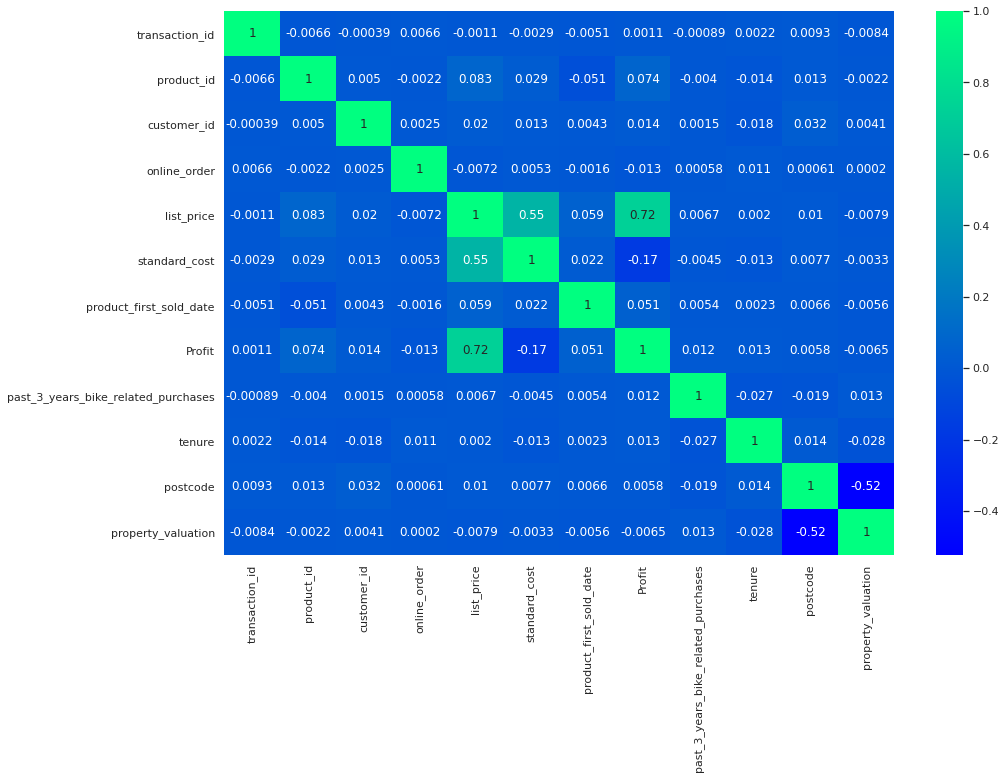

In [40]:
plt.figure(figsize=(15,10))
sns.set_theme()
sns.heatmap(data=data.corr(), annot=True, cmap='winter')

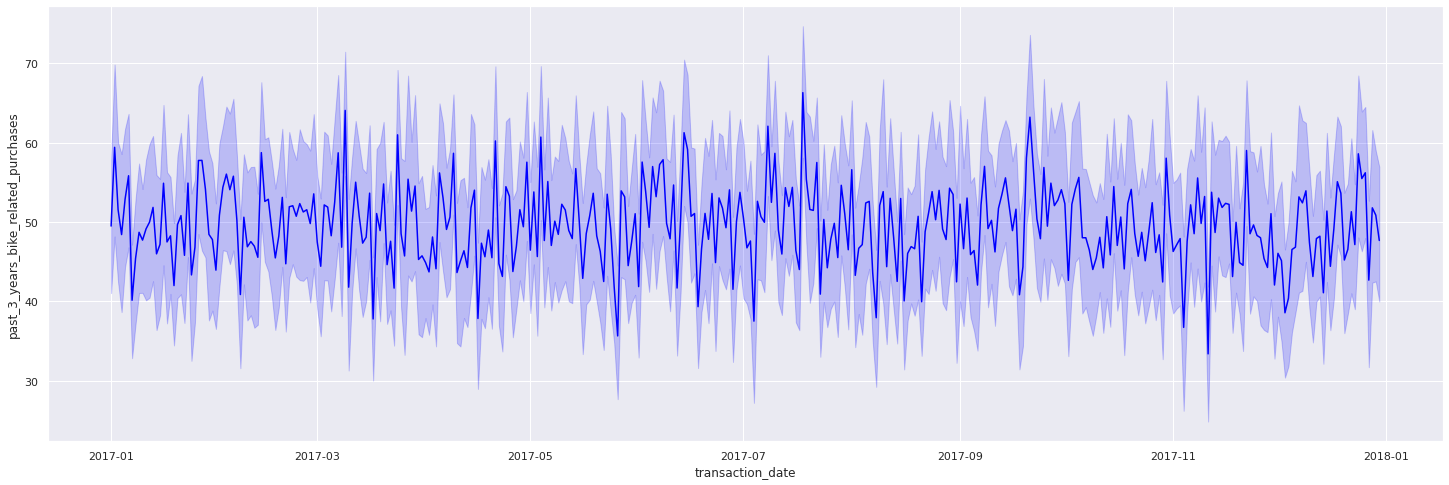

In [41]:
plt.figure(figsize=(25,8))
sns.lineplot(y = data['past_3_years_bike_related_purchases'], x = data['transaction_date'], color = 'blue');

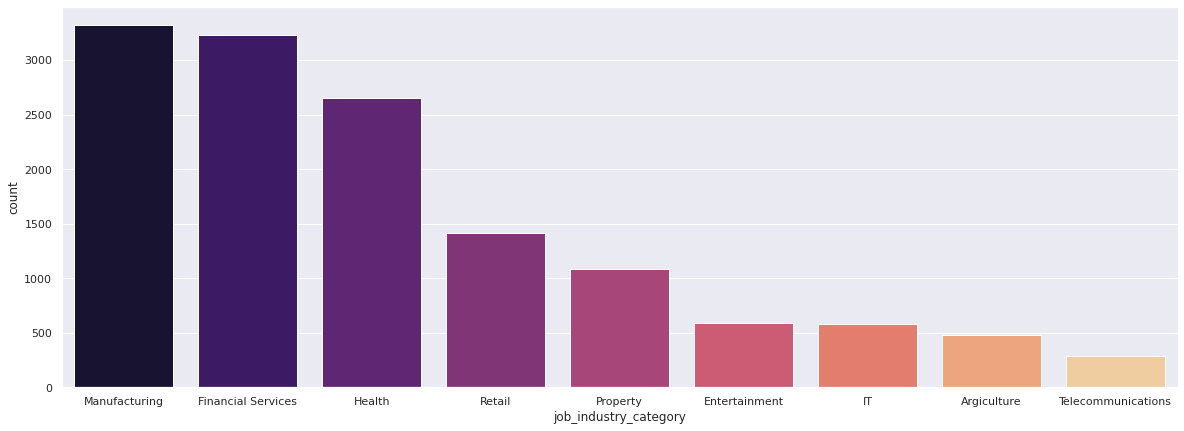

In [42]:
plt.figure(figsize=(20,7))
sns.countplot(data['job_industry_category'], order = data['job_industry_category'].value_counts().index, palette = "magma");

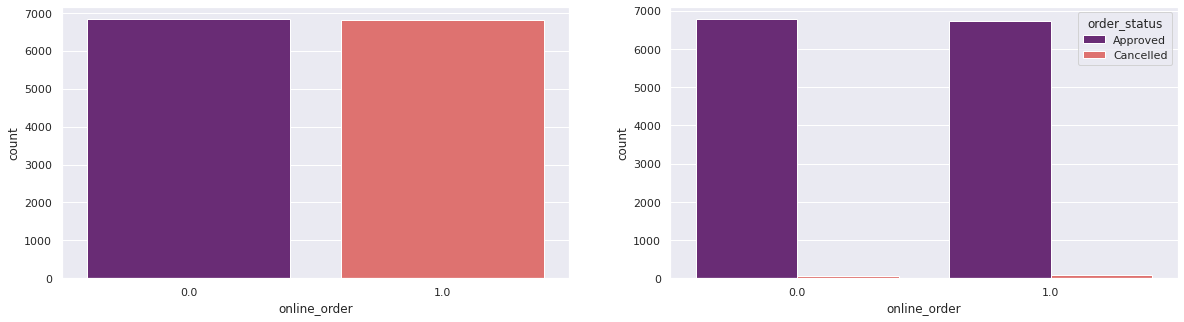

In [43]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(data['online_order'], palette = "magma");

plt.subplot(1,2,2)
sns.countplot(data['online_order'], hue = data['order_status'], palette = "magma");

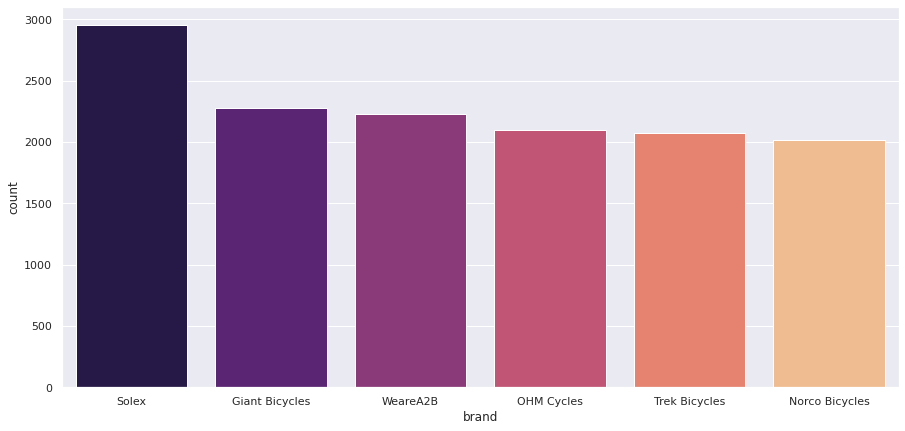

In [44]:
plt.figure(figsize=(15,7))
sns.countplot(data['brand'],order = data['brand'].value_counts().index, palette = "magma");

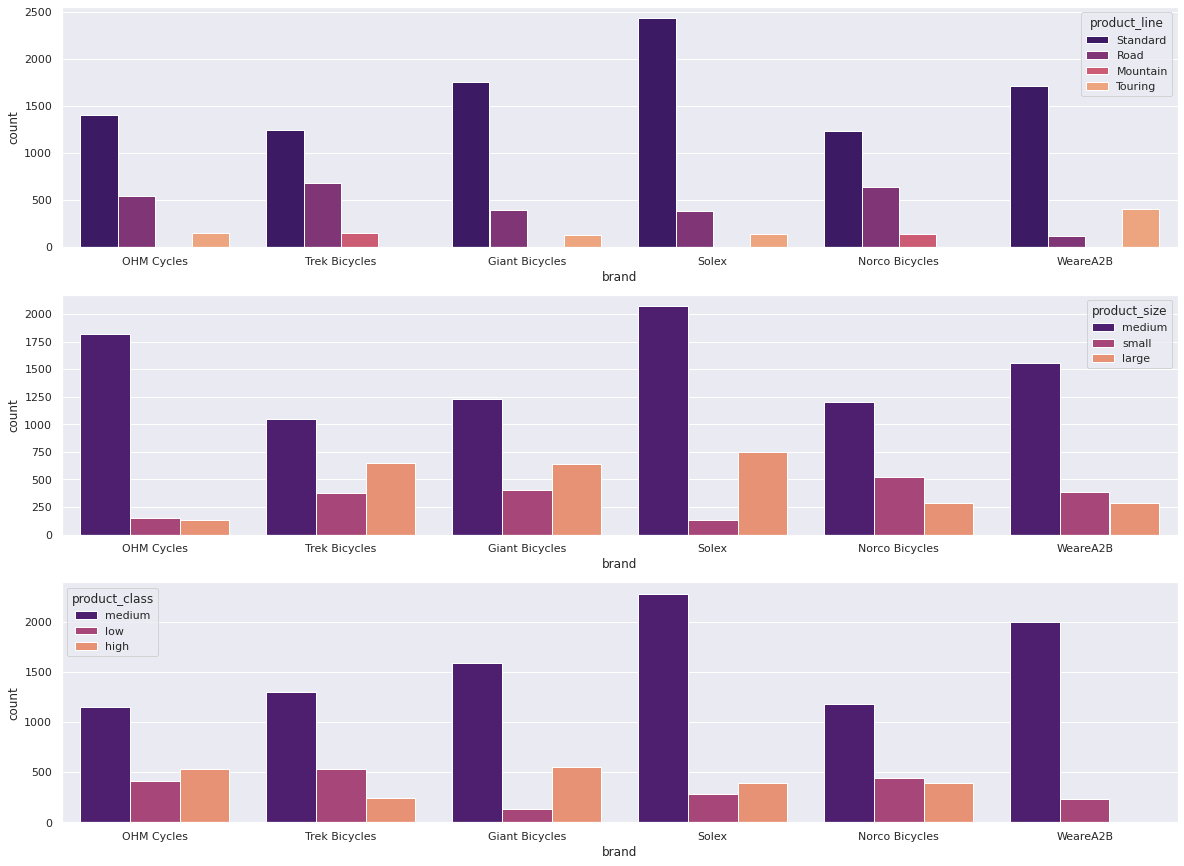

In [45]:
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
sns.countplot(data['brand'], hue = data['product_line'],palette = "magma");
plt.subplot(3,1,2)
sns.countplot(data['brand'], hue = data['product_size'],palette = "magma");
plt.subplot(3,1,3)
sns.countplot(data['brand'], hue = data['product_class'], palette = "magma");

Text(0.5, 1.0, 'PROFIT W.R. TO ONLINE ORDER')

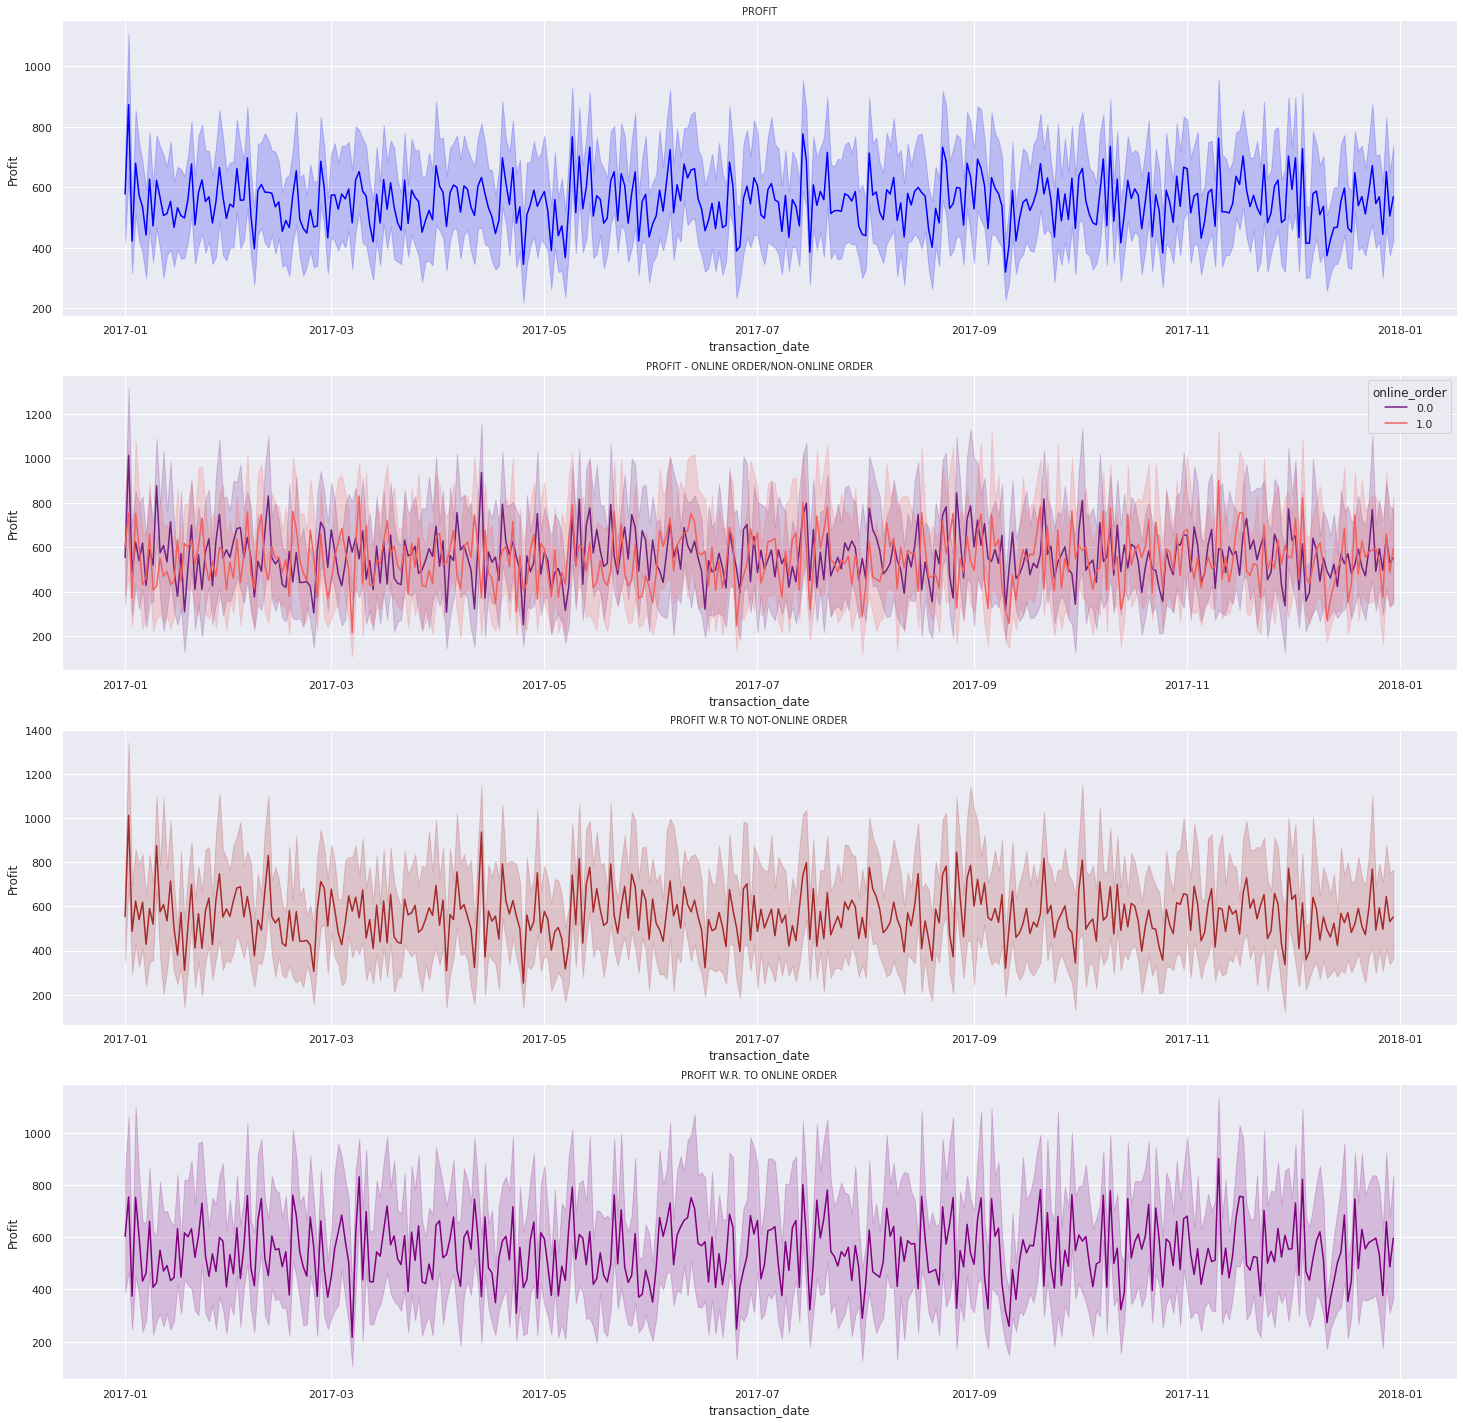

In [46]:
plt.figure(figsize=(25,25))
plt.subplot(4,1,1)
sns.lineplot(y = data["Profit"], x = data['transaction_date'], color = 'blue');
plt.title("PROFIT", fontsize = 10)

plt.subplot(4,1,2)
sns.lineplot(y = data["Profit"], x = data['transaction_date'], hue = data["online_order"], palette='magma');
plt.title("PROFIT - ONLINE ORDER/NON-ONLINE ORDER", fontsize=10)

plt.subplot(4,1,3)
sns.lineplot(y = "Profit", x = 'transaction_date', data = data[data['online_order']==0.0], color = 'brown');
plt.title("PROFIT W.R TO NOT-ONLINE ORDER", fontsize = 10)

plt.subplot(4,1,4)
sns.lineplot(y = "Profit", x = 'transaction_date', data = data[data['online_order']==1.0], color = 'purple');
plt.title("PROFIT W.R. TO ONLINE ORDER", fontsize = 10)

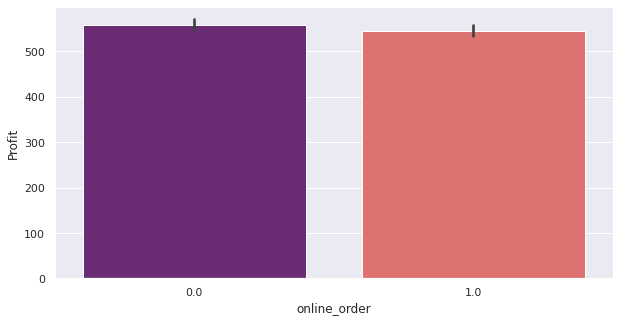

In [47]:
plt.figure(figsize = (10,5))
sns.barplot(x=data['online_order'], y = data['Profit'], palette = "magma");

Text(0.5, 1.0, 'PROFIT DISTRIBUTION BASED ON PRODUCT CLASS')

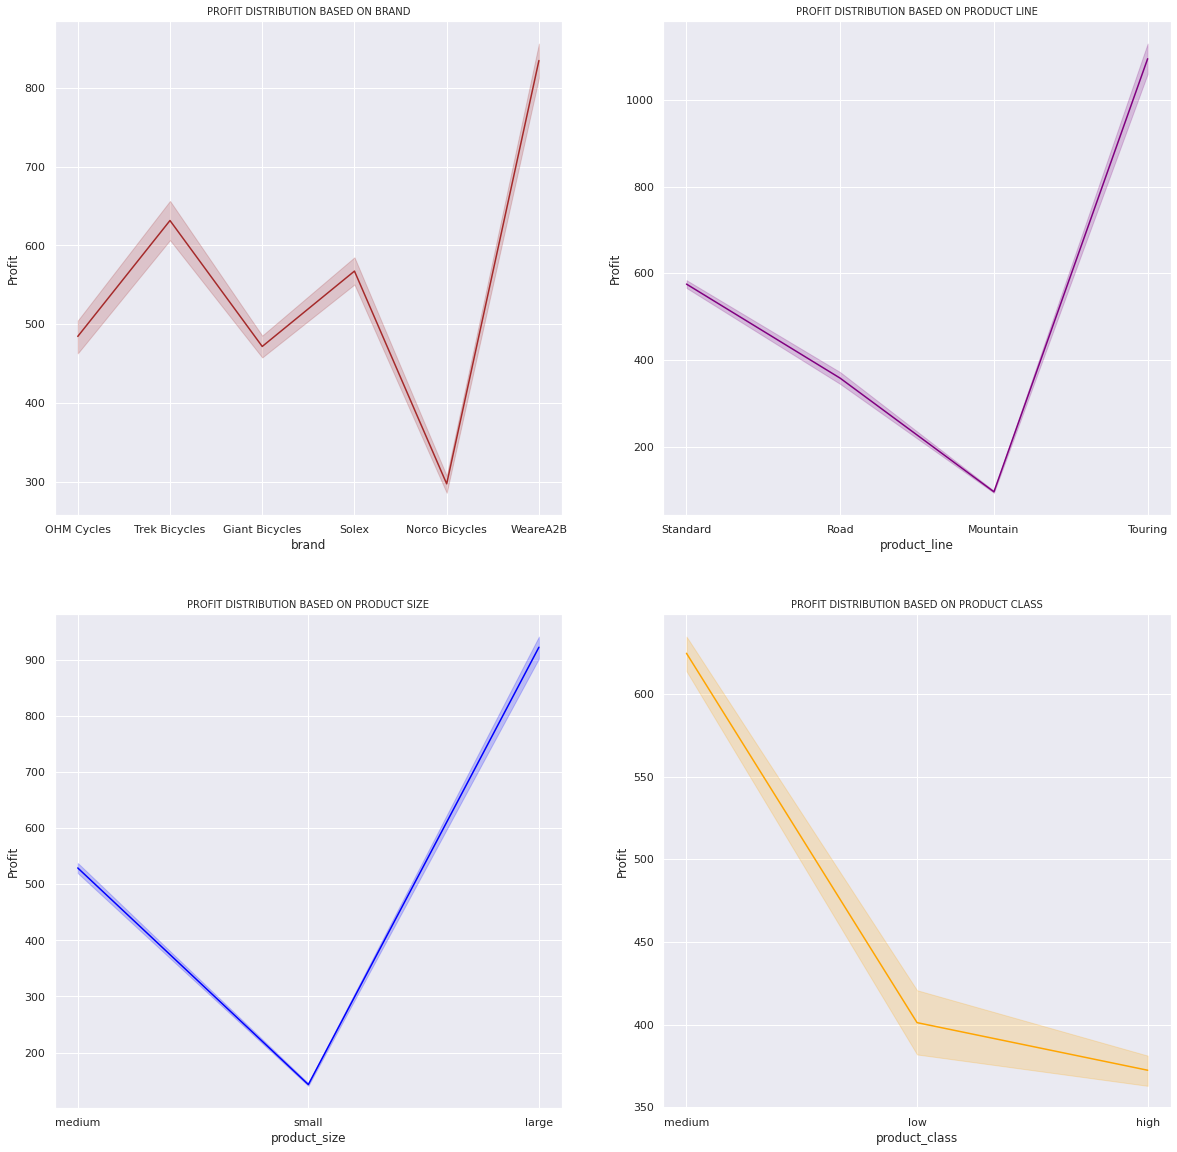

In [48]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.lineplot(x = data['brand'], y = data['Profit'],color = "brown");
plt.title("PROFIT DISTRIBUTION BASED ON BRAND", fontsize = 10)

plt.subplot(2,2,2)
sns.lineplot(x = data['product_line'], y = data['Profit'],color = "purple");
plt.title("PROFIT DISTRIBUTION BASED ON PRODUCT LINE", fontsize=10)

plt.subplot(2,2,3)
sns.lineplot(x = data['product_size'], y = data['Profit'], color = "blue");
plt.title("PROFIT DISTRIBUTION BASED ON PRODUCT SIZE", fontsize = 10)

plt.subplot(2,2,4)
sns.lineplot(x = data['product_class'], y = data['Profit'], color = "orange");
plt.title("PROFIT DISTRIBUTION BASED ON PRODUCT CLASS", fontsize = 10)

Text(0.5, 1.0, 'PROFIT DISTRIBUTION BASED ON PRODUCT CLASS')

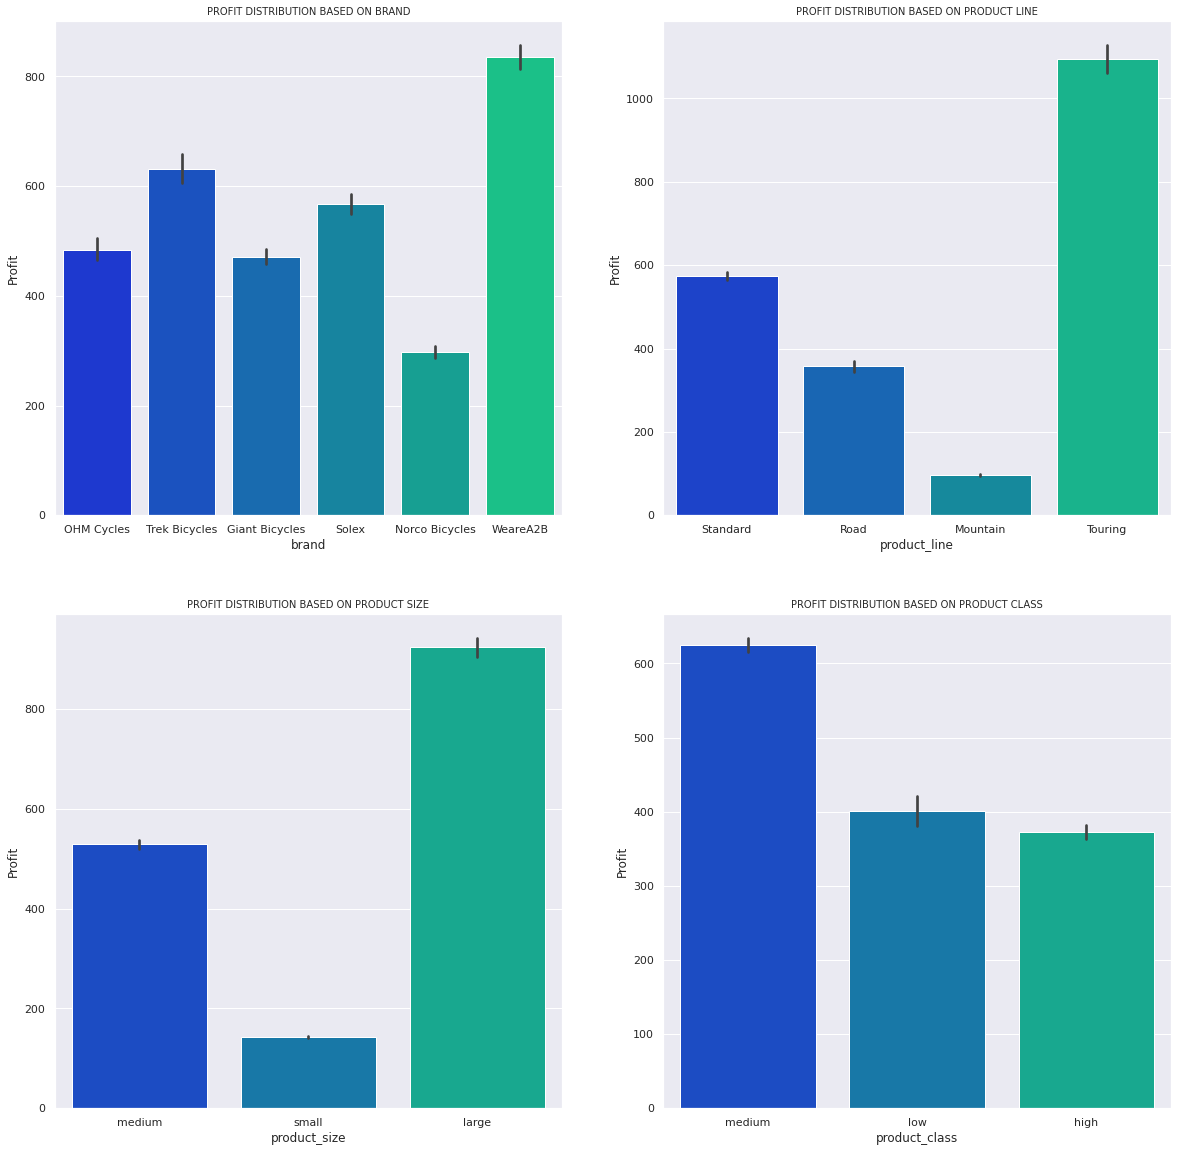

In [49]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.barplot(x = data['brand'], y = data['Profit'], palette = "winter");
plt.title("PROFIT DISTRIBUTION BASED ON BRAND", fontsize = 10)

plt.subplot(2,2,2)
sns.barplot(x = data['product_line'], y = data['Profit'], palette = "winter");
plt.title("PROFIT DISTRIBUTION BASED ON PRODUCT LINE", fontsize=10)

plt.subplot(2,2,3)
sns.barplot(x = data['product_size'], y = data['Profit'], palette = "winter");
plt.title("PROFIT DISTRIBUTION BASED ON PRODUCT SIZE", fontsize = 10)

plt.subplot(2,2,4)
sns.barplot(x = data['product_class'], y = data['Profit'], palette = "winter");
plt.title("PROFIT DISTRIBUTION BASED ON PRODUCT CLASS", fontsize = 10)

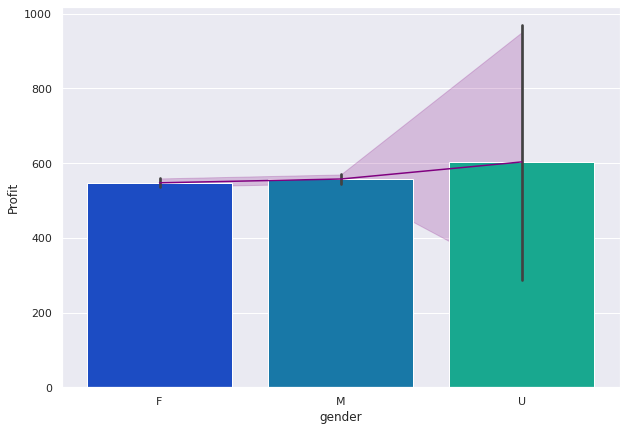

In [50]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'gender', y='Profit', data=data, palette = "winter")
sns.lineplot(x = 'gender', y='Profit', data=data, color = 'purple');

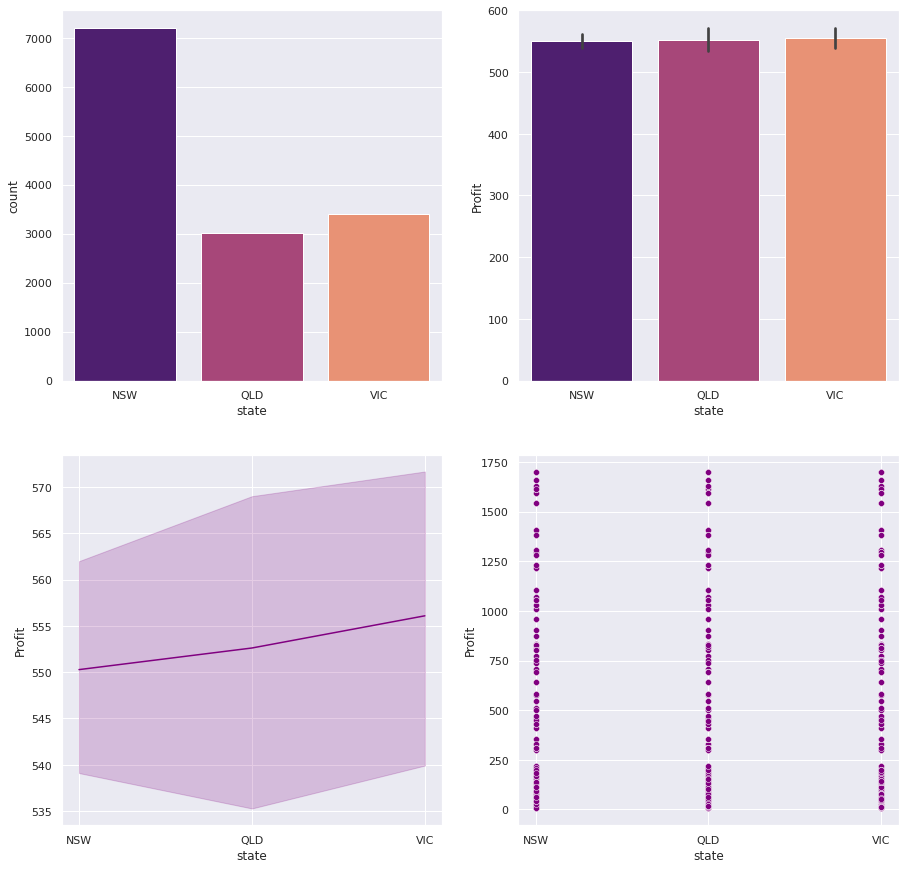

In [51]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.countplot(data['state'], palette = 'magma')

plt.subplot(2,2,2)
sns.barplot(x = data['state'], y = data['Profit'], palette = "magma")

plt.subplot(2,2,3)
sns.lineplot(x = data['state'], y = data['Profit'], color = "purple")

plt.subplot(2,2,4)
sns.scatterplot(x = data['state'], y = data['Profit'], color = "purple");

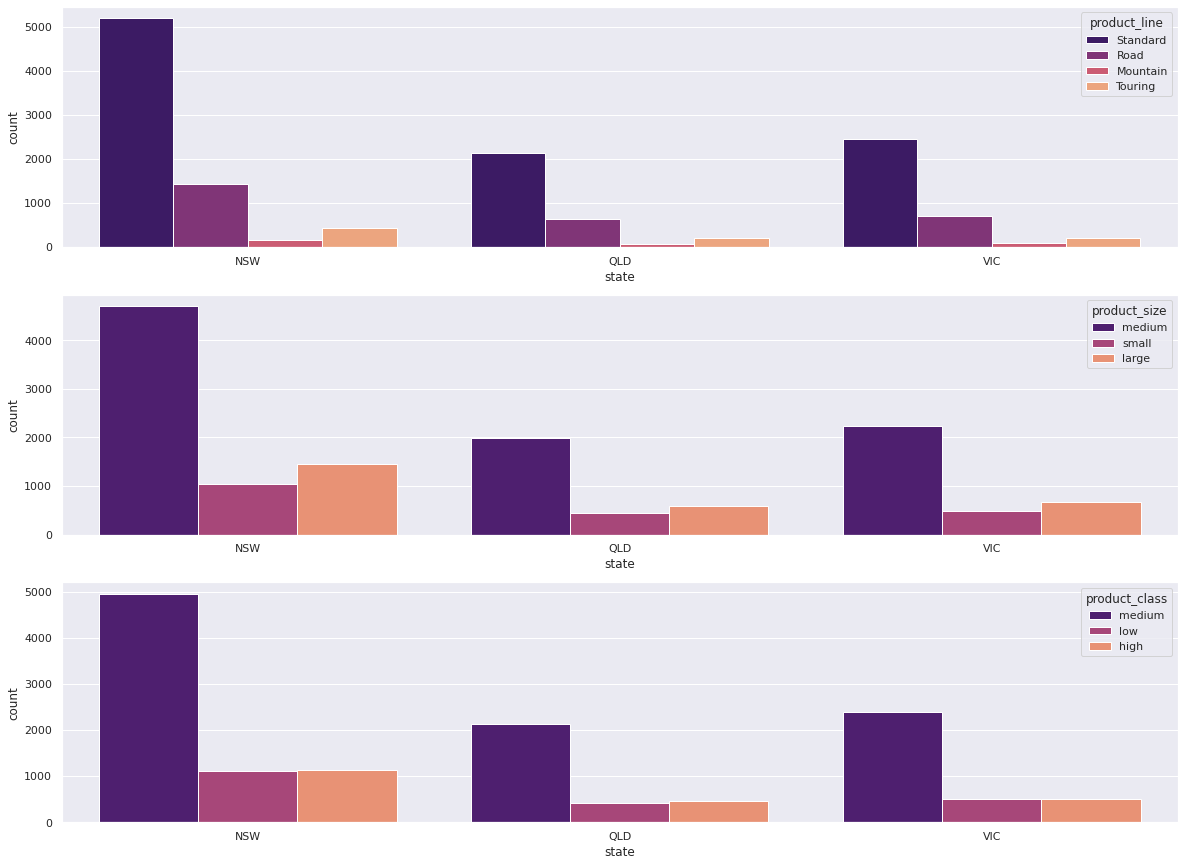

In [52]:
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
sns.countplot(data['state'], hue = data['product_line'],palette = "magma");
plt.subplot(3,1,2)
sns.countplot(data['state'], hue = data['product_size'],palette = "magma");
plt.subplot(3,1,3)
sns.countplot(data['state'], hue = data['product_class'], palette = "magma");

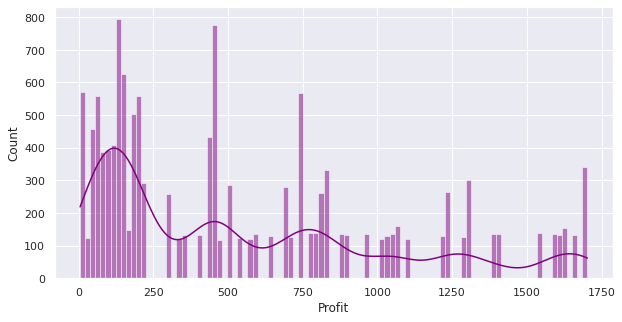

In [53]:
plt.figure(figsize = (10,5))
sns.histplot(data['Profit'], color = "purple", kde = True, bins = 100);

In [54]:
data1 = pd.merge(DemoGraph, CA, on = 'customer_id')
data1 = data1.dropna()

In [55]:
data2 = pd.merge(data1, Transact, on='customer_id')
print('no. of duplicate values: {}'.format(data2.duplicated().sum()))
print('no. of null values: \n {}'.format(data2.isnull().sum()))

no. of duplicate values: 0
no. of null values: 
 customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
transaction_id                         0
product_id                             0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_

In [56]:
data2.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,94,86,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,110.56
1,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,5157,47,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,189.28
2,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,18970,11,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0,509.97
3,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,13424,2,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,17.87
4,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,15663,32,2017-06-04,1.0,Approved,Giant Bicycles,Standard,medium,medium,642.70,211.37,40618.0,431.33


In [57]:
conditions = [
    (data2['Profit'] > 827.16),
    (data2['Profit'] <= 827.16) & (data2['Profit'] >= 445.21),
    (data2['Profit'] < 445.21) & (data2['Profit'] >= 135.85),
    (data2['Profit'] <135.85)
    ]

values = ['tier_1', 'tier_2', 'tier_3', 'tier_4']

In [58]:
data2['age'] = pd.to_datetime('today').year-pd.DatetimeIndex(data2['DOB']).year 
data2['tier'] = np.select(conditions, values)
data2.drop(data2[data2['age'] > 100].index, axis = 0, inplace = True)
data2.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit,age,tier
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,94,86,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,110.56,68,tier_4
1,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,5157,47,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,189.28,68,tier_3
2,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,18970,11,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0,509.97,68,tier_2
3,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,13424,2,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,17.87,68,tier_4
4,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,15663,32,2017-06-04,1.0,Approved,Giant Bicycles,Standard,medium,medium,642.70,211.37,40618.0,431.33,68,tier_3


In [59]:
data2.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,transaction_id,product_id,online_order,list_price,standard_cost,product_first_sold_date,Profit,age
count,13628.000000,13628.000000,13628.000000,13628.000000,13628.000000,13628.000000,13628.000000,13628.000000,13628.000000,13628.000000,13628.000000,13628.000000,13628.000000
mean,1715.722483,49.495451,10.739287,2998.708174,7.474391,10005.906810,45.600602,0.499560,1110.136508,557.915940,38222.701350,552.220568,43.800925
std,1010.437800,28.599635,5.669325,859.520660,2.843436,5768.982289,30.496613,0.500018,584.296826,408.559282,2880.777731,493.955348,12.535210
min,1.000000,0.000000,1.000000,2000.000000,1.000000,1.000000,0.000000,0.000000,12.010000,7.210000,33259.000000,4.800000,19.000000
25%,829.000000,25.000000,6.000000,2197.000000,6.000000,5035.750000,18.000000,0.000000,575.270000,215.140000,35667.000000,135.850000,34.000000
50%,1715.500000,48.000000,11.000000,2768.000000,8.000000,9999.500000,44.000000,0.000000,1163.890000,507.580000,38216.000000,445.210000,44.000000
75%,2583.000000,74.000000,16.000000,3796.750000,10.000000,14989.250000,72.000000,1.000000,1635.300000,795.100000,40779.000000,827.160000,53.000000
max,3497.000000,99.000000,22.000000,4883.000000,12.000000,20000.000000,100.000000,1.000000,2091.470000,1759.850000,42710.000000,1702.550000,90.000000


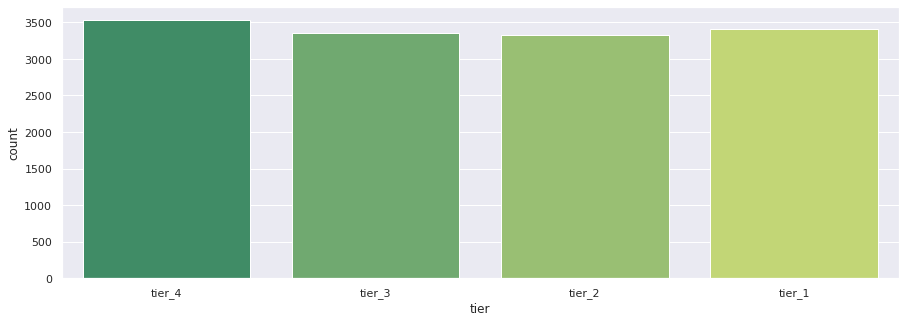

In [60]:
plt.figure(figsize=(15,5))
sns.countplot(data2['tier'], palette = 'summer')
plt.show()

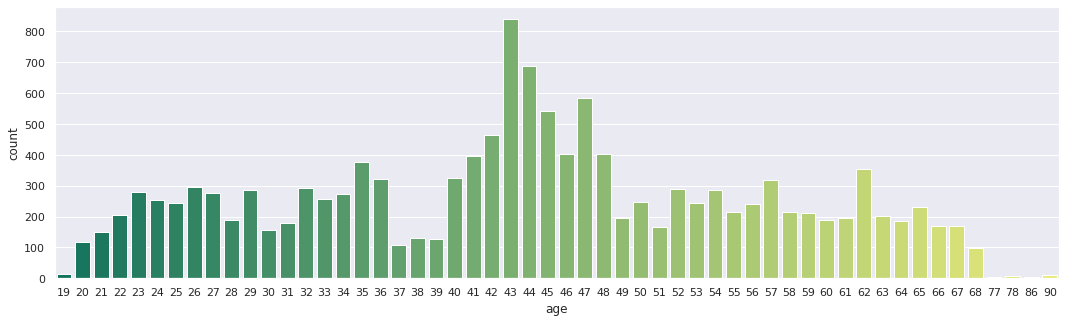

In [61]:
plt.figure(figsize=(18,5))
sns.countplot(data2['age'], palette = 'summer')
plt.show()

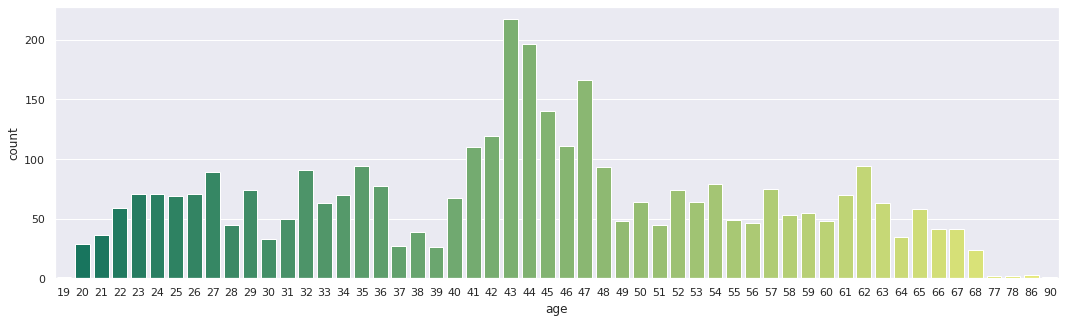

In [62]:
plt.figure(figsize=(18,5))
data3 = data2[data2['tier']=='tier_4']
sns.countplot(data3['age'], palette = 'summer')
plt.show()

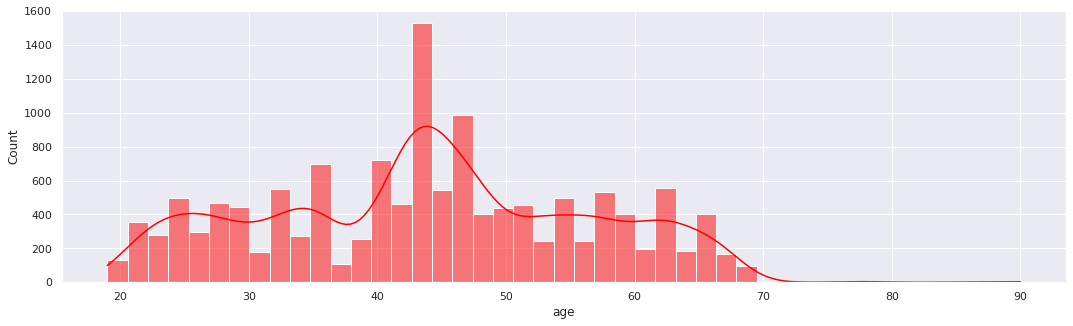

In [63]:
plt.figure(figsize=(18,5))
sns.histplot(data2['age'], kde = True, color = 'red')
plt.show()

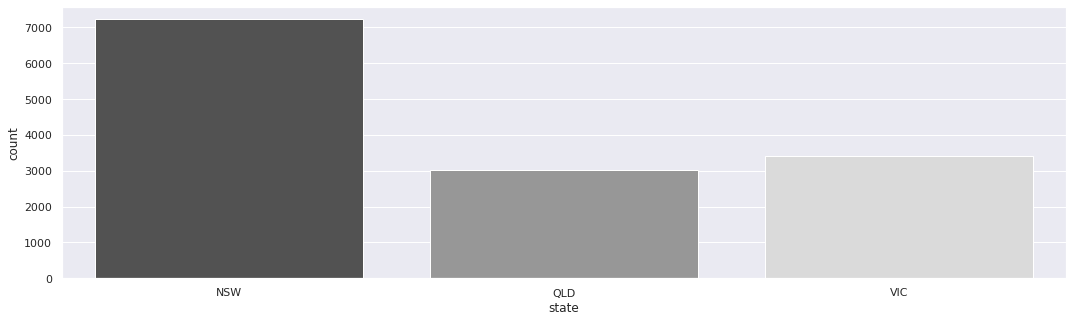

In [77]:
plt.figure(figsize=(18,5))
sns.countplot(data2['state'], palette = 'Greys_r')
plt.show()

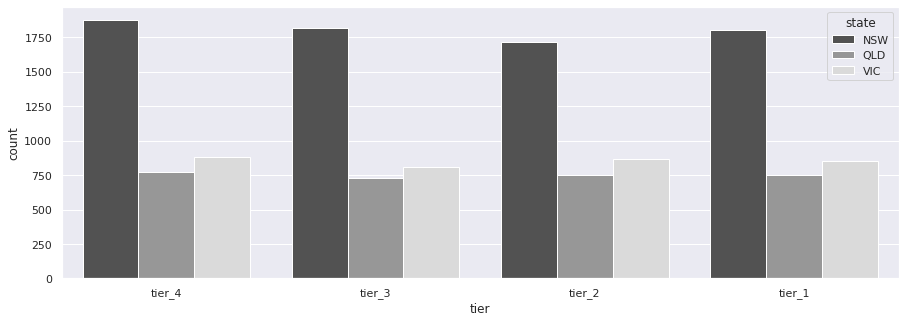

In [78]:
plt.figure(figsize=(15,5))
sns.countplot(data2['tier'], hue = data2['state'], palette = 'Greys_r')
plt.show()

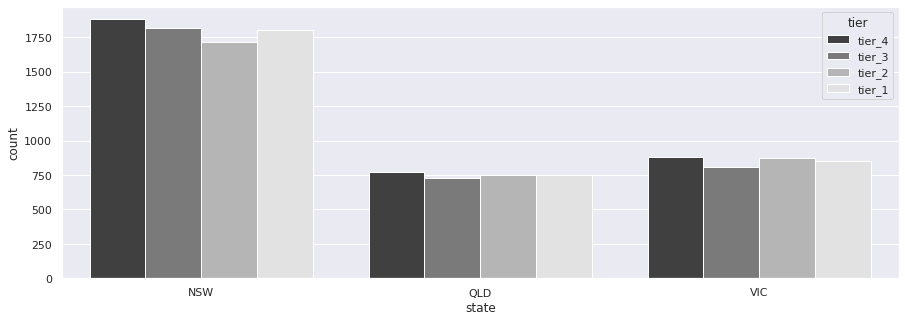

In [79]:
plt.figure(figsize=(15,5))
sns.countplot(data2['state'], hue = data2['tier'], palette = 'Greys_r')
plt.show()

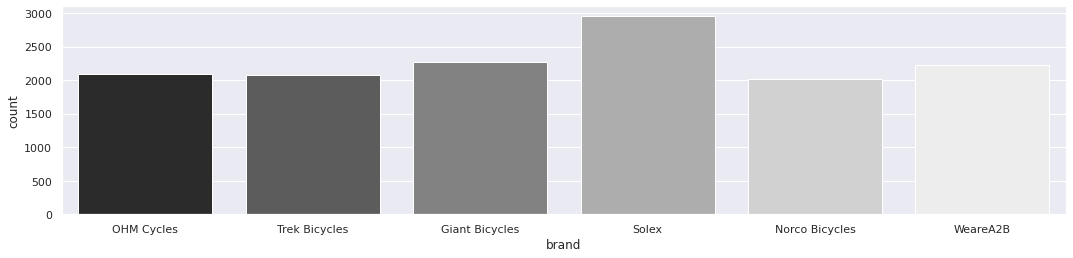

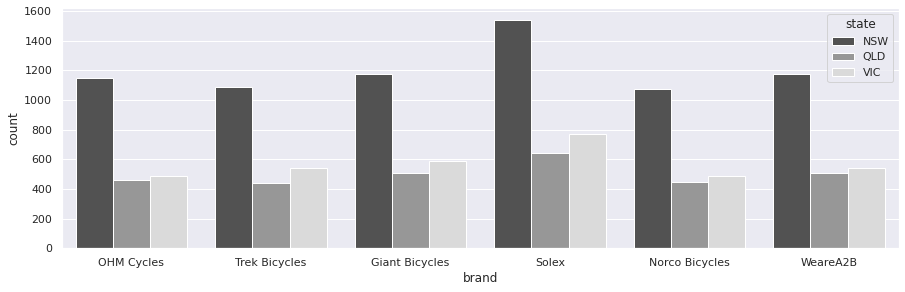

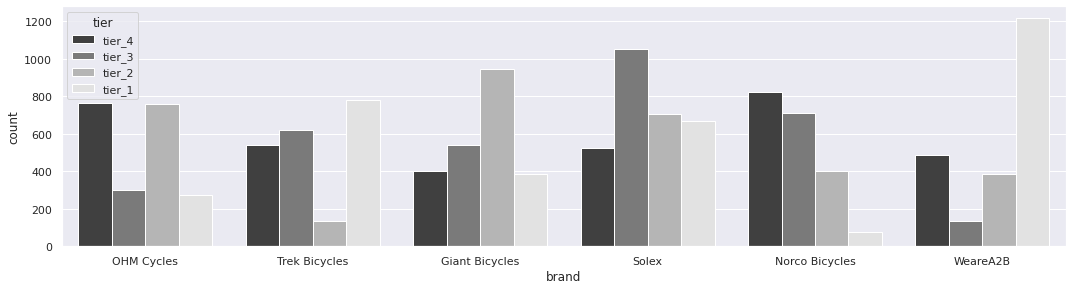

In [94]:
plt.figure(figsize=(18,13))
plt.subplot(3,1,1)
sns.countplot(data2['brand'], palette = 'Greys_r')
plt.show()

plt.figure(figsize=(15,15))
plt.subplot(3,1,2)
sns.countplot(data2['brand'], hue = data2['state'], palette = 'Greys_r')
plt.show()


plt.figure(figsize=(18,15))
plt.subplot(3,1,3)
sns.countplot(data2['brand'], hue = data2['tier'], palette = 'Greys_r')
plt.show()

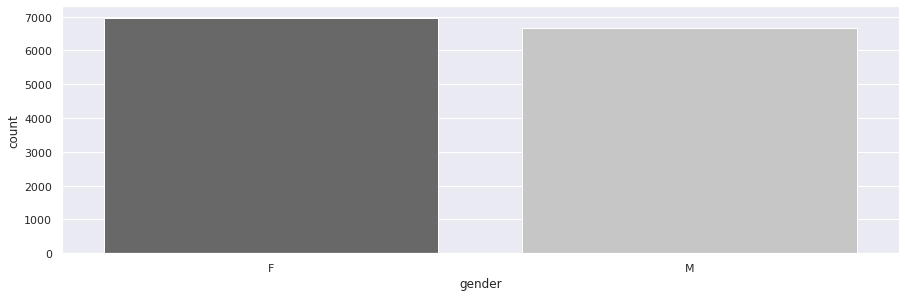

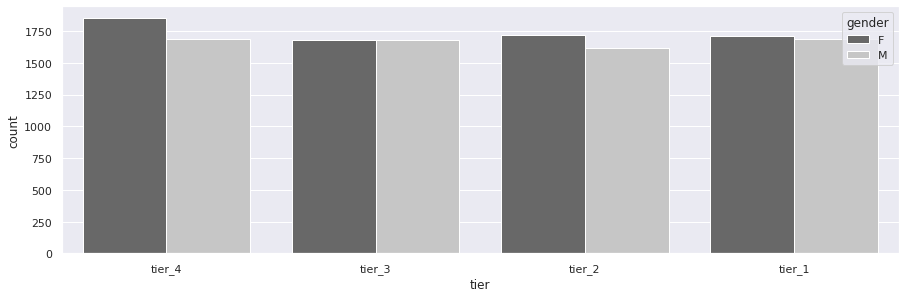

In [81]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.countplot(data2['gender'], palette = 'Greys_r')
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(2,1,2)
sns.countplot(data2['tier'], hue = data2['gender'], palette = 'Greys_r')
plt.show()

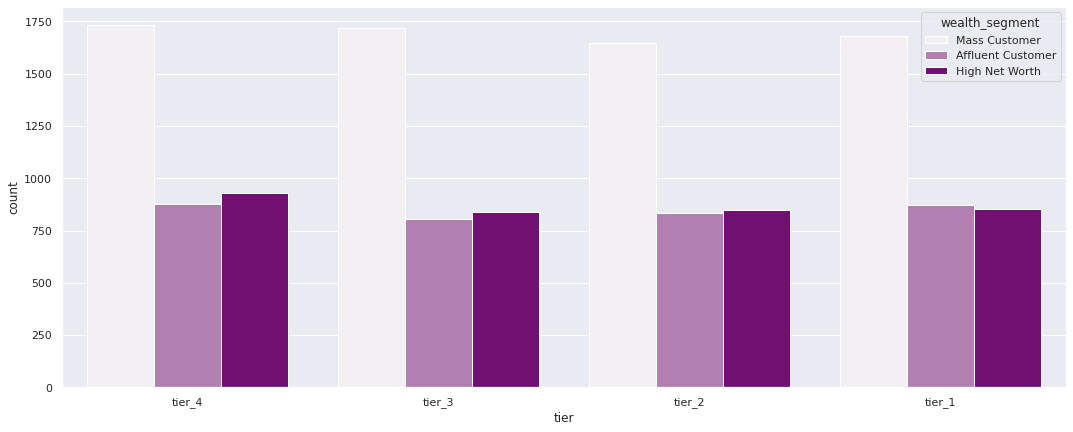

In [106]:
plt.figure(figsize=(18,7))
sns.countplot(data2['tier'], hue = data2['wealth_segment'], color = 'purple')
plt.show()

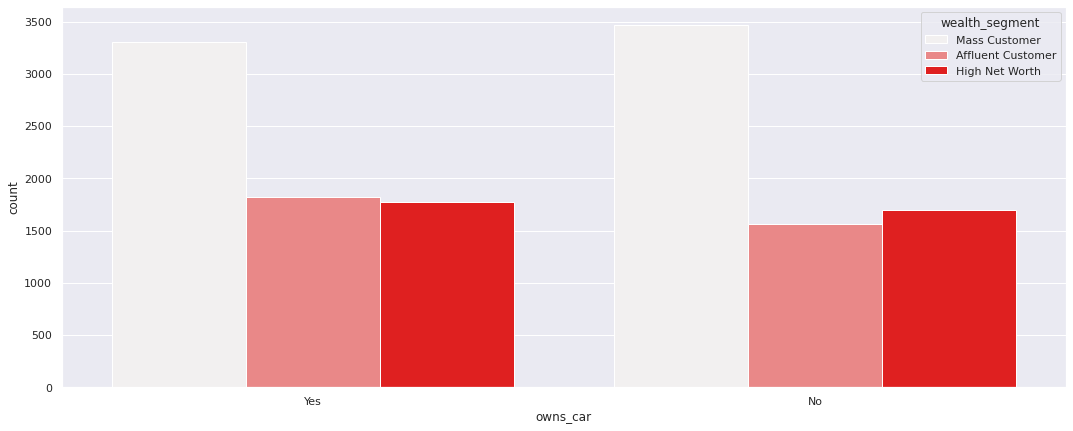

In [107]:
plt.figure(figsize=(18,7))
sns.countplot(data2['owns_car'], hue = data2['wealth_segment'], color = 'red')
plt.show()

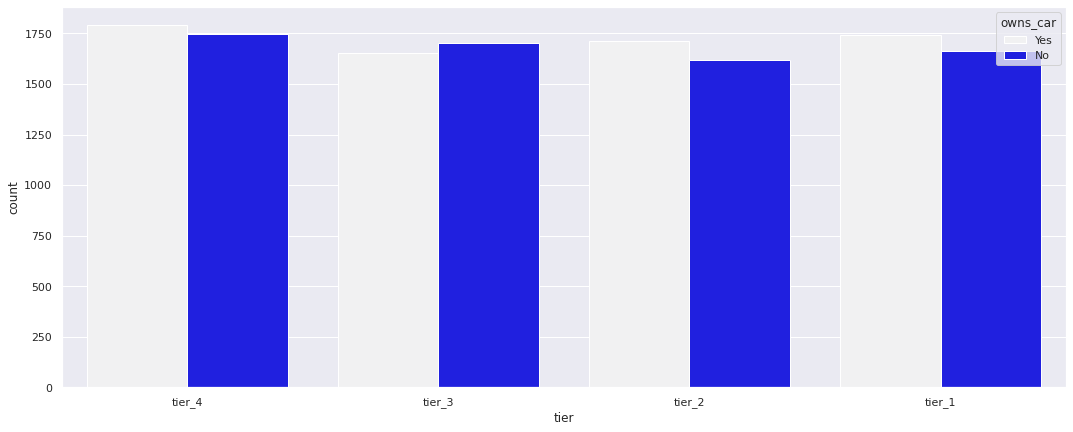

In [110]:
plt.figure(figsize=(18,7))
sns.countplot(data2['tier'], hue = data2['owns_car'],color = 'blue')
plt.show()

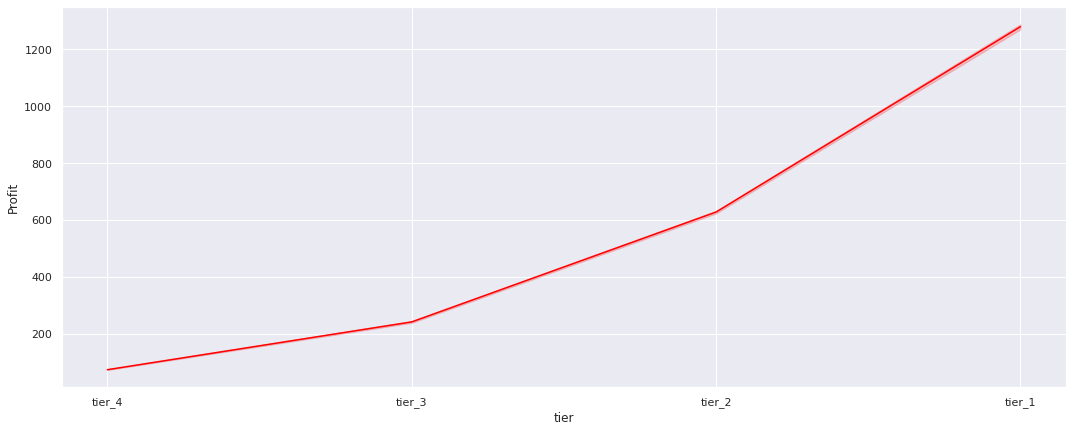

In [85]:
plt.figure(figsize=(18,7))
sns.lineplot(x = data2['tier'], y = data2['Profit'], color = 'red')
plt.show()

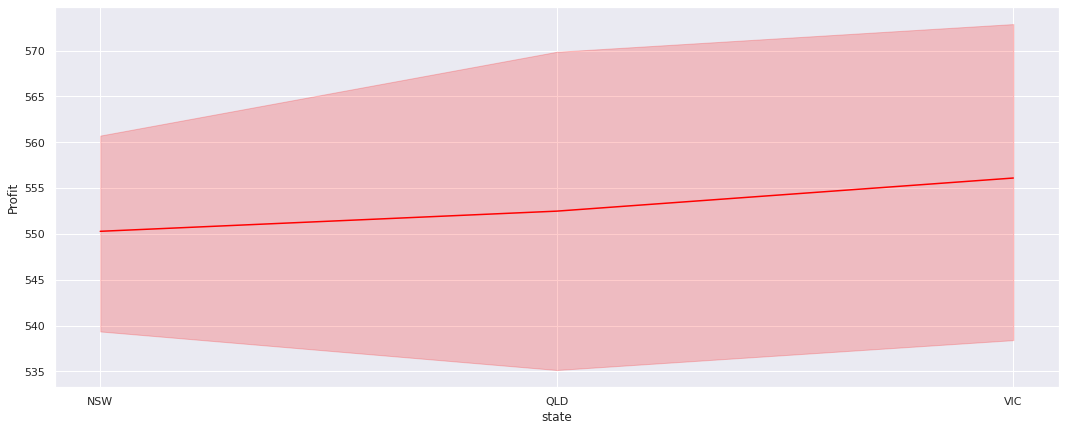

In [100]:
plt.figure(figsize=(18,7))
sns.lineplot(x = data2['state'], y = data2['Profit'], color = 'red')
plt.show()

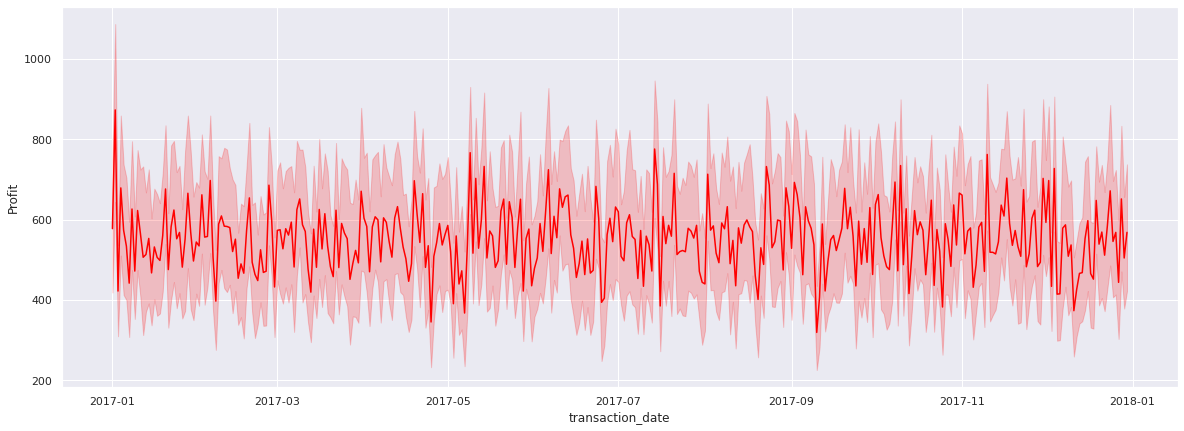

In [101]:
plt.figure(figsize=(20,7))
sns.lineplot(x = data2['transaction_date'], y = data2['Profit'], color = 'red')
plt.show()